# Rejection Sampling

수학에서 리젝션 샘플링(rejection sampling)은 분포에서 표본을 표집하는 기본적인 방법이다. 이는 몬테카를로 방법 중의 하나로, $\mathbb{R}^m$에서 확률 밀도를 갖는 분포에 모두 적용될 수 있다.

리젝션 샘플링 기법은 2차원 평면에서 균일한 샘플을 샘플링한 후에 분포의 밀도 함수의 지지집합에 해당하는 표본들을 선택적으로 남기는 기법이라고 볼 수 있다. 이 관점은 N-차원에 모두 적용될 수 있다.

### 샘플 추출하기

우리가 알고 싶어하는 타겟 분포를 정규분포 (0,1) 라고 하자. 이제부터 우리는 이러한 정규분포가 어떤 분포인지 모르지만, rejection sampling방법을 통해분포에서 표본을 표집해보도록 할 것이다.

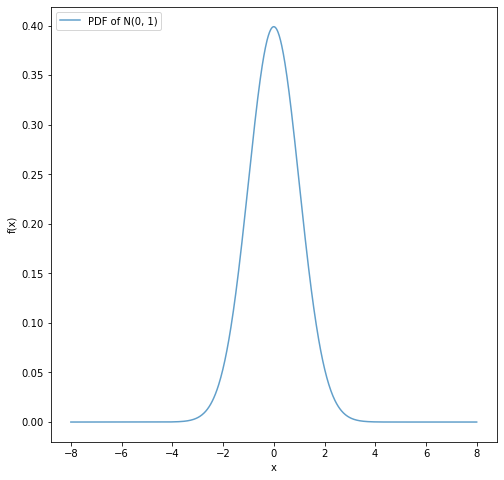

In [99]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

plt.figure(figsize=(8,8))
mu = 0
sigma = 1.0

x = np.linspace(-8, 8 ,1000)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma ** 2))

plt.plot(x, y, alpha=0.7, label='PDF of N(0, 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left')
plt.show()

### 제안 분포 (proposal distribution)

rejection sampling을 위해서는 제안 분포를 설정해야 한다. 이러한 제안분포를 $g(x)$라고 해보자. 제안 분포 g(x)를 이용해서 우리는 샘플을 추출하도록 할 것이다. 가장 간단한 제안분포로는 uniform distribution이 존재한다.

제안분포를 설정하는데 있어서, 타겟 분포와 가장 유사한 형태의 제안분포를 설정하는 것이 좋다고 나오지만, 이는 현실적으로 불가능할 것이다. 따라서 맘편하게 uniform distribution을 사용해보자.

이 예시에서는 uniform distribution의 정의역을 다음과 같이 설정한다.

$$x=\{x|-4\leq x < 4\}$$
제안 분포는 다음과 같다.
$$g(x)=\begin{cases}1/8,\:\:\text{if}\:-4\leq x < 4 \\ 0 \: \text{otherwise}  \end{cases}$$

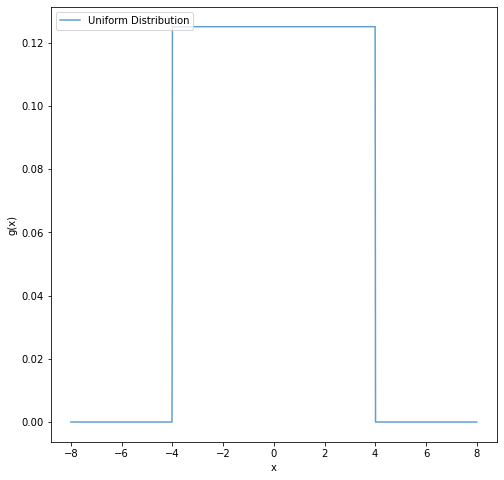

In [106]:
import numpy as np 
import matplotlib.pyplot as plt 
 
x = np.linspace(-8, 8, 1000)
y1 = [ (i - i) if i < -4 or i > 4 else (i - i + 1/8) for i in x]
    
plt.figure(figsize=(8,8))

plt.plot(x, y1, alpha=0.7, label='Uniform Distribution')
plt.ylabel('g(x)')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.show()

둘을 함께 보면 다음과 같다

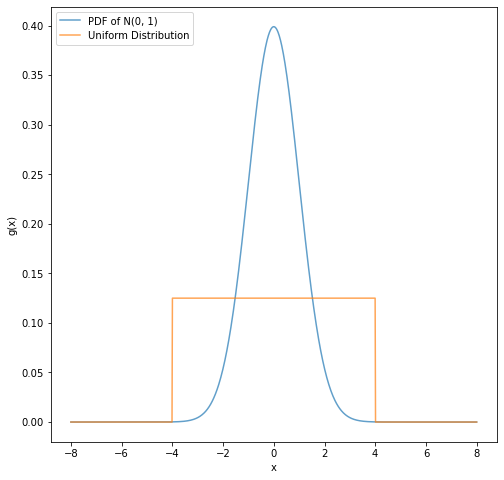

In [107]:
plt.figure(figsize=(8,8))
plt.plot(x, y, alpha=0.7, label='PDF of N(0, 1)')
plt.plot(x, y1, alpha=0.7, label='Uniform Distribution')
plt.ylabel('g(x)')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.show()

Rejection sampling을 위해서는, 제안분포에 상수배($M$)를 취해 y축에서도 타겟분포가 모두 포함될 수 있도록 만들어 주어야 한다.

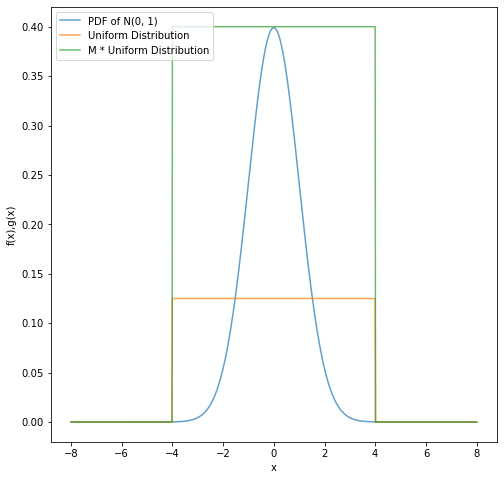

In [111]:
y2 = [ (i - i) if i < -4 or i > 4 else (i - i + 1/8)*(0.4/0.125) for i in x]
plt.figure(figsize=(8,8))
plt.plot(x, y, alpha=0.7, label='PDF of N(0, 1)')
plt.plot(x, y1, alpha=0.7, label='Uniform Distribution')
plt.plot(x, y2, alpha=0.7, label='M * Uniform Distribution')
plt.ylabel('f(x),g(x)')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.show()

## 샘플링

위의 과정에서처럼 제안분포와 적절한 상수를 정했다면, rejection sampling을 할 수 있다.

가장 먼저 해줘야 할 것은 제안분포 $g(x)$에서 샘플 하나($x_0$)를 추출하는 것이다.

In [143]:
x_0 = np.random.randint(0,1000,1)

그러고나서, 타겟분포 $f(x)$와 상수배한 $Mg(x)$의 likelihood를 비교해야 한다.
제안분포 $g(x)$로 부터 추출한 x0에 대해 $f(x_0)$와 $Mg(x_0)$의 함수값을 비교하는 것이다.
크기를 비교할 때는, 두 함수값을 나눠서 비교한다

$$f(x_0)/(Mg(x_0))$$

타겟 분포의 크기가 $Mg(x)$만큼 높으면 1에 가까울 것이고 아니면 작을 것이다.
이 값을 통해 unfiform distribution의 샘플값과 비교한다.
$$x=\{x|0\leq x < 1\}$$

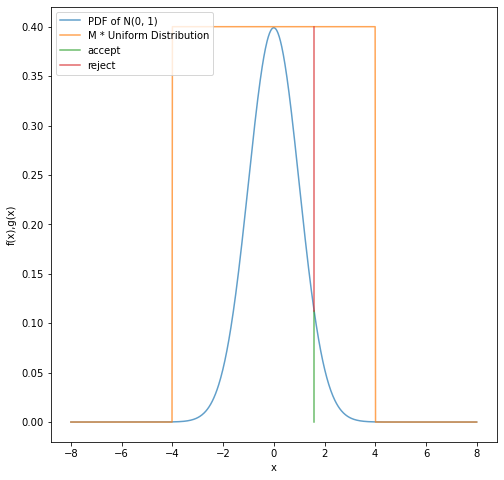

In [158]:
accept = np.linspace(0,y[int(x_0)],1000)
reject = np.linspace(y[int(x_0)],y2[int(x_0)],1000)
xx_0 = np.ones_like(accept)*x[x_0]

plt.figure(figsize=(8,8))
plt.plot(x, y, alpha=0.7, label='PDF of N(0, 1)')
plt.plot(x, y2, alpha=0.7, label='M * Uniform Distribution')
plt.plot(xx_0,accept, alpha=0.7, label='accept')
plt.plot(xx_0,reject, alpha=0.7, label='reject')
plt.ylabel('f(x),g(x)')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.show()

위의 그림에서, likelihood ratio를 uniform distribution의 출력값과 비교하게 되면, 타겟 분포 $f(x)$의 높이가 $Mg(x)$만큼 높은 곳일 수록 accept확률이 높다는 것을 알 수 있다.

따라서 알고리즘은 다음과 같다.

Set $i=1$ Repeat until $i=N$
1. Sample $x^{(i)}\sim q(x)$ and $u\sim U_{(0,1)}$.
2. If $u < {f(x^{(i)})\over{Mg(x^{(i)})}}$, then accept $x^{(i)}$ and increment the counter $i$ by 1. Otherwise, reject.

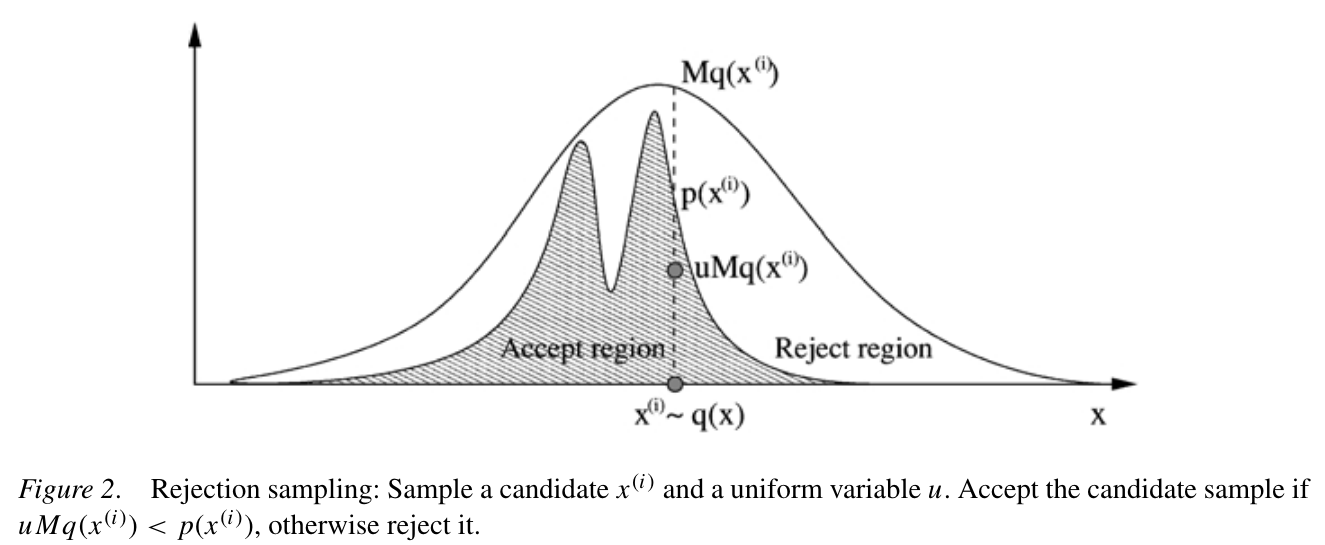

In [197]:
M = (0.4/0.125)
accepted_x = []
accepted_y = []

rejected_x = []
rejected_y = []

for i in range(2000):
    x_i = np.random.randint(250,750,1) # 0으로 나눠지면 안됨
    u = np.random.uniform(0, 1)
    if u < y[int(x_i)]/(y2[int(x_i)]+1e-15):
        accepted_x.append(x[int(x_i)])
        accepted_y.append(u)
    else:
        rejected_x.append(x[int(x_i)])
        rejected_y.append(u)

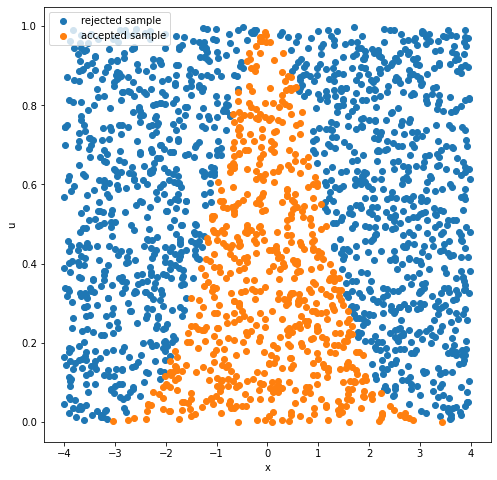

In [205]:
plt.figure(figsize=(8,8))
plt.scatter(rejected_x,rejected_y, label ='rejected sample')
plt.scatter(accepted_x, accepted_y, label = 'accepted sample')
plt.ylabel('u')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.show()

최종적으로 얻어진 샘플들을 원래 구하고자 했던 타겟 분포와 함께 히스토그램을 그리면 다음과 같다.

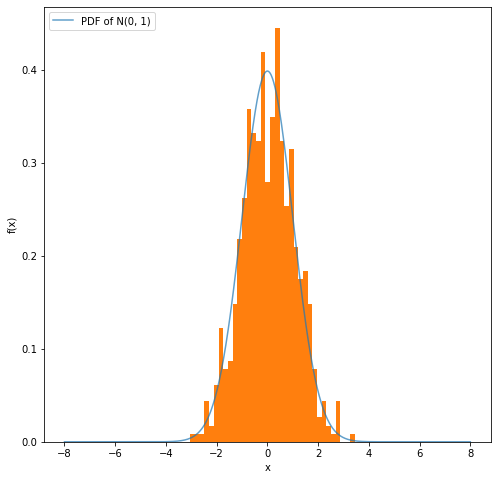

In [220]:
plt.figure(figsize=(8,8))
plt.plot(x, y, alpha=0.7, label='PDF of N(0, 1)')
plt.hist(accepted_x,bins=35,density=True,)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.show()

이러한 간단한 Rejection sampling은 심각한 한계점이 존재하는데, 바로 $p(x)/q(x)$가 항상 합리적인 constant $M$으로부터 전체 공간 $\chi$에 대해 포함하지 못할 수 있다는 것이다. 만약에 $M$이 엄청나게 커지면 acceptance probability는

$$\text{Pr}(x \:\text{accepted})=\text{Pr}(u<{p(x)\over{Mq(x)}})={1\over{M}}$$
이 너무 작아진다. 따라서 고차원의 공간에서 실제로 사용하기 어렵다